# Descriptive and Predictive Analytics 
    
Project on Advanced Analytics in Fundraising - “How knowing donors helps in growing donors”

In [248]:
# Installing the required Packages

import sys
import pandas               as pd
import numpy                as np
import seaborn              as sns
import matplotlib.pyplot    as plt
from pandas                 import DataFrame
from pandas                 import read_csv
from pandas                 import Series
from numpy                  import array
from numpy                  import random
#from ieseg                  import detect_outlier
from matplotlib             import pyplot
import warnings
warnings.filterwarnings("ignore")

In [249]:
# Read all source CSV files and store them in  required variables
campaign = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/campaigns.csv",sep=";")
donor = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/donors.csv",sep=",")
gift = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/gifts.csv",sep=",")
train_set = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/selection campaign 6169.csv",sep=",")
test_set = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/selection campaign 7244.csv",sep=",")

# Data Preprocess//Data Cleaning

# Gifts Table

In [348]:
gift = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/gifts.csv",sep=",")

In [349]:
gift.head()

,Unnamed: 0,donorID,campaignID,amount,date
0,0,100001,NaN,"12,39",2004-03-23
1,1,100001,1.58E+03,"12,39",2007-10-11
2,2,100001,1.63E+03,"6,69",2007-12-28
3,3,100001,1.78E+03,"24,79",2008-06-14
4,4,100001,1.81E+03,"7,44",2008-07-09


In [350]:
gift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  216594 non-null  int64  
 1   donorID     216594 non-null  int64  
 2   campaignID  200957 non-null  float64
 3   amount      216594 non-null  object 
 4   date        216594 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 8.3+ MB


In [351]:
#check null value columns
gift.isna().sum()

Unnamed: 0        0
donorID           0
campaignID    15637
amount            0
date              0
dtype: int64

 We have 1 column having missing values and the rest are of wrong data type:

1) Changing the type of date column to date type
2) Changing the campaignID to int, and handling the missing values of this column
3) Changing datatype of amount to int as we use this for mathematical calculations

In [352]:
#changing date datatype
gift['date'] = pd.to_datetime(gift['date'])

In [353]:
#replace comma with dot from amount before converting it to float
gift['amount']= gift['amount'].str.replace(',','')

In [354]:
gift.head()

,Unnamed: 0,donorID,campaignID,amount,date
0,0,100001,NaN,1239,2004-03-23
1,1,100001,1.58E+03,1239,2007-10-11
2,2,100001,1.63E+03,669,2007-12-28
3,3,100001,1.78E+03,2479,2008-06-14
4,4,100001,1.81E+03,744,2008-07-09


In [355]:
#changing Amount datatype to float from string
gift['amount'] = gift['amount'].astype(float)

In [356]:
#gift['amount'] = pd.set_option('precision', 2)

In [362]:
gift['amount'] =  gift['amount'].round()

In [363]:
gift['amount'].sort_values()

152747     1.00E+00
210571     2.00E+00
159456     2.00E+00
26193      3.00E+00
190423     3.00E+00
            ...    
53730     48.33E+15
56484     48.33E+15
124568    54.54E+15
216264    64.48E+15
172552    65.78E+15
Name: amount, Length: 216594, dtype: float64

In [324]:
#As there are many digits after decimal point, removing all values except first 2 precession

gift['amount'] = float("{:.2f}".format(gift['amount']))


TypeError: unsupported format string passed to Series.__format__

In [275]:
#extract year month and date from date
gift['gift_year'] = pd.DatetimeIndex(gift['date']).year
gift['gift_month'] = pd.DatetimeIndex(gift['date']).month
gift['gift_day'] = pd.DatetimeIndex(gift['date']).day

In [276]:
#Handling the .0 in the campaignID column:
gift['campaignID'] = gift['campaignID'].astype(str)
gift['campaignID'] = gift.campaignID.str.extract('(\d+)')

In [277]:
gift = gift.sort_values(['gift_year', 'gift_month', 'gift_day'])


In [278]:
gift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216594 entries, 27754 to 199518
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  216594 non-null  int64         
 1   donorID     216594 non-null  int64         
 2   campaignID  200957 non-null  object        
 3   amount      216594 non-null  float64       
 4   date        216594 non-null  datetime64[ns]
 5   gift_year   216594 non-null  int64         
 6   gift_month  216594 non-null  int64         
 7   gift_day    216594 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 14.9+ MB


In [279]:
gift.isna().sum()

Unnamed: 0        0
donorID           0
campaignID    15637
amount            0
date              0
gift_year         0
gift_month        0
gift_day          0
dtype: int64

In [280]:
#Replacing all missing value of campaignID with zeroes:
gift['campaignID'] = gift['campaignID'].fillna(0)

In [281]:
gift['campaignID'].isna().sum()

0

# Donors Table

In [282]:
donor = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/donors.csv",sep=",")

In [283]:
donor.head()

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
0,0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [284]:
#Check datatypes
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   44691 non-null  int64  
 1   donorID      44691 non-null  int64  
 2   zipcode      44689 non-null  float64
 3   province     44691 non-null  object 
 4   region       44691 non-null  object 
 5   gender       44659 non-null  object 
 6   language     44691 non-null  object 
 7   dateOfBirth  44691 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.7+ MB


In [285]:
#Check missing values
donor.isna().sum()

Unnamed: 0      0
donorID         0
zipcode         2
province        0
region          0
gender         32
language        0
dateOfBirth     0
dtype: int64

We have 2 columns having missing values and most of them are of wrong data type:

Handling the 2 missing values for zipcode and changing the type to int
Handling the missing values for gender and using LabelEncoder to change it to a boolean type
Changing the type of dateOfBirth to date type and computing the year from the dateOfBirth

In [286]:
# Check rows where donor zipcode value is missing
donor[donor['zipcode'].isna()]

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
5019,5019,105020,NaN,Missing,Missing,M,EN,11/09/1966
22100,22100,122101,NaN,Missing,Missing,F,EN,10/31/1975


In [287]:
# We can't replace the zipcode with zero, as there's already a donor with a zipcode of 0
donor[donor['zipcode']==0]

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
15231,15231,115232,0.0,Walloon Brabant,Wallonia,M,FR,02/06/1932


In [288]:
# Let's look at all donors who speak 'EN' language, given that both missing zipcode donors are EN speaking
donor[donor['language']=='EN']

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
533,533,100534,3080.0,Flemish Brabant,Flanders,M,EN,06/07/1982
5019,5019,105020,NaN,Missing,Missing,M,EN,11/09/1966
6634,6634,106635,3080.0,Flemish Brabant,Flanders,F,EN,01/14/1966
22100,22100,122101,NaN,Missing,Missing,F,EN,10/31/1975
26348,26348,126349,3080.0,Flemish Brabant,Flanders,M,EN,06/23/1954
43374,43374,143375,3090.0,Flemish Brabant,Flanders,F,EN,11/07/1962


In [289]:
# Checking the amounts of donations made by the Donors with missing Zipcode
ziptest=pd.merge(gift, donor, how="inner", on="donorID")

In [290]:
ziptest[ziptest['zipcode'].isna()].groupby('donorID')['amount'].mean()

donorID
105020    46132.800000
122101     1902.666667
Name: amount, dtype: float64

We can confirm that the donor 105020  and 122101 are high paying donors hence dropping this row out would not justify

In [291]:
#Replacing the missing zipcode with 3080 as it's the most frequent value where:
#language=EN, region=Flanders & province=Flemish Brabant
donor['zipcode'].fillna(3080,inplace=True)

In [292]:
#Converting the zipcode to string, extracting the number till the '.', and then converting to int
donor['zipcode'] = donor['zipcode'].astype(str)
donor['zipcode'] = donor.zipcode.str.extract('(\d+)')
donor['zipcode'] = donor['zipcode'].astype(int)

In [293]:
#Change the datatype of birthdate
donor['dateOfBirth'] = pd.to_datetime(donor['dateOfBirth'])

Dealing with the gender column


In [294]:
donor['gender'].isna().sum()

32

In [295]:
#Checking rows if any donor gender value is missing
donor[donor['gender'].isna()].count()

Unnamed: 0     32
donorID        32
zipcode        32
province       32
region         32
gender          0
language       32
dateOfBirth    32
dtype: int64

In [296]:
#merge donor table with gift again to understand total nulls with regards to gender

gendertest=pd.merge(gift,donor,how="inner", on="donorID")


In [297]:

# If we drop the rows where the gender is unknown, we would loose 172 rows:
gendertest[gendertest['gender'].isna()].count()

Unnamed: 0_x    172
donorID         172
campaignID      172
amount          172
date            172
gift_year       172
gift_month      172
gift_day        172
Unnamed: 0_y    172
zipcode         172
province        172
region          172
gender            0
language        172
dateOfBirth     172
dtype: int64

In [298]:
# Total amount spent by donors whose gender is missing
gendertest[gendertest['gender'].isna()]['amount'].sum()

169745.0

In [299]:
# Total amount spent by all donors
gendertest.groupby('donorID')['amount'].sum().sum()

6.791737703286417e+17

In [300]:
# Percentage of spends by donors whose gender is missing over Total amount spent by all donors
(gendertest[gendertest['gender'].isna()]['amount'].sum()) / gendertest.groupby('donorID')['amount'].sum().sum() * 100

2.4992867424468264e-11

instead of droping rows where gender is missing, we'll use one-hot-encoding on the gender column

In [301]:
donor['gender'].fillna('Missing',inplace=True)

One-Hot encoding the gender columns

In [302]:
genders = pd.get_dummies(donor['gender'])
genders.columns = ['Gender_M', 'Gender_F', 'Gender_Missing']
donor = donor.join(genders)
donor.drop('gender', axis=1, inplace=True)
donor.head()

,Unnamed: 0,donorID,zipcode,province,region,language,dateOfBirth,Gender_M,Gender_F,Gender_Missing
0,0,100001,1861,Flemish Brabant,Flanders,NL,1967-12-24,1,0,0
1,1,100002,2260,Antwerp,Flanders,NL,1952-01-14,0,1,0
2,2,100003,1780,Flemish Brabant,Flanders,NL,1986-12-23,0,1,0
3,3,100004,1020,Brussels,Brussels,FR,1952-03-29,1,0,0
4,4,100005,1020,Brussels,Brussels,FR,1986-06-25,1,0,0


One-Hot encoding the language column

In [303]:
languages = pd.get_dummies(donor['language'])
languages.columns = ['EN', 'FR', 'NL']
donor = donor.join(languages)
donor.drop('language', axis=1, inplace=True)
donor.head()

,Unnamed: 0,donorID,zipcode,province,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,NL
0,0,100001,1861,Flemish Brabant,Flanders,1967-12-24,1,0,0,0,0,1
1,1,100002,2260,Antwerp,Flanders,1952-01-14,0,1,0,0,0,1
2,2,100003,1780,Flemish Brabant,Flanders,1986-12-23,0,1,0,0,0,1
3,3,100004,1020,Brussels,Brussels,1952-03-29,1,0,0,0,1,0
4,4,100005,1020,Brussels,Brussels,1986-06-25,1,0,0,0,1,0


Calculating age from the dateOfBirth column

In [304]:
donor['gift_year'] = pd.DatetimeIndex(donor['dateOfBirth']).year

In [305]:
donor['age'] = pd.to_datetime('today').year - donor['gift_year']

In [306]:
donor.head()

,Unnamed: 0,donorID,zipcode,province,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,gift_year,age
0,0,100001,1861,Flemish Brabant,Flanders,1967-12-24,1,0,0,0,0,1,1967,54
1,1,100002,2260,Antwerp,Flanders,1952-01-14,0,1,0,0,0,1,1952,69
2,2,100003,1780,Flemish Brabant,Flanders,1986-12-23,0,1,0,0,0,1,1986,35
3,3,100004,1020,Brussels,Brussels,1952-03-29,1,0,0,0,1,0,1952,69
4,4,100005,1020,Brussels,Brussels,1986-06-25,1,0,0,0,1,0,1986,35


In [307]:
donor[(donor['age'] > 120)]

,Unnamed: 0,donorID,zipcode,province,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,gift_year,age
27008,27008,127009,9000,East Flanders,Flanders,1889-06-14,1,0,0,0,0,1,1889,132
27453,27453,127454,8820,West Flanders,Flanders,1892-08-06,1,0,0,0,0,1,1892,129


Dealing with province and region coloumn

In [308]:
donor['province'].unique()

array(['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant',
       'West Flanders', 'East Flanders', 'Liege', 'Luxembourg', 'Namur',
       'Hainaut', 'Limburg', 'ANTWERP', 'Missing'], dtype=object)

In [309]:
donor['region'].unique()

array(['Flanders', 'Brussels', 'Wallonia', 'Missing'], dtype=object)

One-Hot encoding the province columns

In [310]:
provinces = pd.get_dummies(donor['province'])
provinces.columns = ['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant',
       'West Flanders', 'East Flanders', 'Liege', 'Luxembourg', 'Namur',
       'Hainaut', 'Limburg', 'ANTWERP', 'Missing']
donor = donor.join(provinces)
donor.drop('province', axis=1, inplace=True)
donor.head()

,Unnamed: 0,donorID,zipcode,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,...,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,ANTWERP,Missing
0,0,100001,1861,Flanders,1967-12-24,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,100002,2260,Flanders,1952-01-14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,100003,1780,Flanders,1986-12-23,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,100004,1020,Brussels,1952-03-29,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,100005,1020,Brussels,1986-06-25,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Campaign Table

In [311]:
campaign = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/campaigns.csv",sep=";")
campaign.head()

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [312]:
campaign.isna().sum()

campaignID     0
date           0
lettersSent    0
CostUnit       0
dtype: int64

In [313]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaignID   367 non-null    int64 
 1   date         367 non-null    object
 2   lettersSent  367 non-null    object
 3   CostUnit     367 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


There are no missing values but we need to change datatypes of variables
1) Convert the date column to date type
2) Convert the lettersSent column to int type
3) Convert the CostUnit to float type

In [314]:
# Converting the date column to the datetime format
campaign['CampaignDate'] = pd.to_datetime(campaign['date'])

# Converting the lettersSent column to int type
campaign['lettersSent'] = campaign['lettersSent'].str.replace('\u202f', '').astype(int)

# Extracting the number from the CostUnit column and then converting to float
campaign['CostUnitEuro'] = campaign.CostUnit.str.extract('(\d+\,\d+)')
campaign['CostUnitEuro'] = campaign['CostUnitEuro'].str.replace(',', '.').astype(float)


In [315]:
campaign.head()

,campaignID,date,lettersSent,CostUnit,CampaignDate,CostUnitEuro
0,153,13/12/2004,6873,"0,17 €",2004-12-13,0.17
1,154,01/01/2005,7656,"0,30 €",2005-01-01,0.30
2,180,18/01/2005,9933,"0,20 €",2005-01-18,0.20
3,433,29/01/2005,7448,"0,59 €",2005-01-29,0.59
4,476,12/02/2005,6605,"0,51 €",2005-12-02,0.51


In [316]:
#dropping costunit column as we have created new column as CostUnitEuro and same with date column as well
campaign.drop('CostUnit', axis=1, inplace=True)
campaign = campaign.drop(columns=['date'])
campaign.head()

,campaignID,lettersSent,CampaignDate,CostUnitEuro
0,153,6873,2004-12-13,0.17
1,154,7656,2005-01-01,0.30
2,180,9933,2005-01-18,0.20
3,433,7448,2005-01-29,0.59
4,476,6605,2005-12-02,0.51


In [317]:
#extract Campaign year month and day from Campaigndate
campaign['camp_year'] = pd.DatetimeIndex(campaign['CampaignDate']).year
campaign['camp_month'] = pd.DatetimeIndex(campaign['CampaignDate']).month
campaign['camp_day'] = pd.DatetimeIndex(campaign['CampaignDate']).day

In [318]:
campaign.head()

,campaignID,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
0,153,6873,2004-12-13,0.17,2004,12,13
1,154,7656,2005-01-01,0.30,2005,1,1
2,180,9933,2005-01-18,0.20,2005,1,18
3,433,7448,2005-01-29,0.59,2005,1,29
4,476,6605,2005-12-02,0.51,2005,12,2


# Outliers

# Outliers in Age

Text(0.5, 0, 'age')

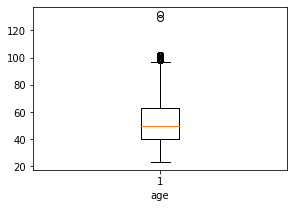

In [319]:
# Visualizing Outliers in Campaign Dataset

donor['age'].value_counts(dropna=False).sort_index(ascending = True)

fig2 = pyplot.figure(figsize=(10,3))
ax1 = fig2.add_subplot(1,2,1)

ax1.boxplot(donor['age'])
ax1.set_xlabel('age')

Assuming that such a high age of these 2 donors (age  132 and 129) could be a typo we repalcing them with appropriate values. Replace 132 with 32 and 129 with 29

In [320]:
# Checking the donors whose age is 132 and 129
donor[(donor['age'] > 120)]

,Unnamed: 0,donorID,zipcode,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,...,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,ANTWERP,Missing
27008,27008,127009,9000,Flanders,1889-06-14,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
27453,27453,127454,8820,Flanders,1892-08-06,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [321]:
#Replace the donor age 131 & 128 with rectified values
gift_camp_don['age']=gift_camp_don['age'].replace([132],32)
gift_camp_don['age']=gift_camp_don['age'].replace([129],29)

# Outliers in Gift amount

Text(0.5, 0, 'amount')

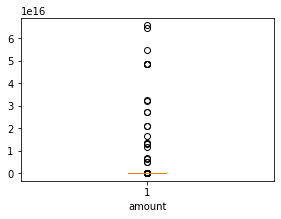

In [322]:
# Visualizing Outliers in Campaign Dataset

gift['amount'].value_counts(dropna=False).sort_index(ascending = True)

fig2 = pyplot.figure(figsize=(10,3))
ax1 = fig2.add_subplot(1,2,1)

ax1.boxplot(gift['amount'])
ax1.set_xlabel('amount')

In [246]:
gift_test = gift.sort_values('amount')

In [247]:
gift_test

,Unnamed: 0,donorID,campaignID,amount,date,gift_year,gift_month,gift_day
152747,152747,123109,2090,1.000000e+00,2009-05-18,2009,5,18
210571,210571,141801,4144,2.000000e+00,2015-06-11,2015,6,11
159456,159456,124744,5016,2.000000e+00,2017-10-31,2017,10,31
190423,190423,133209,3815,3.000000e+00,2014-09-23,2014,9,23
89756,89756,111010,2415,3.000000e+00,2010-06-10,2010,6,10
...,...,...,...,...,...,...,...,...
56480,56480,106396,0,4.833400e+16,2001-03-20,2001,3,20
56483,56483,106396,0,4.833400e+16,2002-05-31,2002,5,31
124568,124568,117401,0,5.453800e+16,2006-03-25,2006,3,25
216264,216264,144623,0,6.448000e+16,2007-06-08,2007,6,8


# Joining all cleaned tables together and creating one basetable to create  features

In [138]:
gift.head()

,Unnamed: 0,donorID,campaignID,amount,date,gift_year,gift_month,gift_day
27754,27754,103039,0,2479.0,2000-06-05,2000,6,5
56616,56616,106414,0,2479.0,2000-06-05,2000,6,5
24168,24168,102754,0,4958.0,2000-06-06,2000,6,6
32735,32735,103525,0,2479.0,2000-06-06,2000,6,6
23099,23099,102674,0,1239.0,2000-06-10,2000,6,10


In [158]:
campaign.head()

,campaignID,lettersSent,CampaignDate,CostUnitEuro
0,153,6873,2004-12-13,0.17
1,154,7656,2005-01-01,0.30
2,180,9933,2005-01-18,0.20
3,433,7448,2005-01-29,0.59
4,476,6605,2005-12-02,0.51


In [140]:
donor.head()

,Unnamed: 0,donorID,zipcode,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,...,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,ANTWERP,Missing
0,0,100001,1861,Flanders,1967-12-24,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,100002,2260,Flanders,1952-01-14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,100003,1780,Flanders,1986-12-23,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,100004,1020,Brussels,1952-03-29,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,100005,1020,Brussels,1986-06-25,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [145]:
#merge Gift and donor based on donorid
gift_don= pd.merge(gift,donor,how='inner',on='donorID')

In [146]:
gift_don.head()

,Unnamed: 0_x,donorID,campaignID,amount,date,gift_year_x,gift_month,gift_day,Unnamed: 0_y,zipcode,...,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,ANTWERP,Missing
0,27754,103039,0,2479.0,2000-06-05,2000,6,5,3038,8301,...,0,0,0,0,0,0,0,0,0,1
1,27755,103039,1212,2479.0,2006-10-04,2006,10,4,3038,8301,...,0,0,0,0,0,0,0,0,0,1
2,56616,106414,0,2479.0,2000-06-05,2000,6,5,6413,8310,...,0,0,0,0,0,0,0,0,0,1
3,56617,106414,0,2479.0,2001-02-01,2001,2,1,6413,8310,...,0,0,0,0,0,0,0,0,0,1
4,56618,106414,979,2479.0,2006-02-09,2006,2,9,6413,8310,...,0,0,0,0,0,0,0,0,0,1


In [159]:
#merge gift_don table with campaign table based on campaign id
gift_camp_don = pd.merge(gift_don,campaign,how='inner',on='campaignID')

In [160]:
gift_camp_don.head()

,Unnamed: 0_x,donorID,campaignID,amount,date,gift_year_x,gift_month,gift_day,Unnamed: 0_y,zipcode,...,Liege,Luxembourg,Namur,Hainaut,Limburg,ANTWERP,Missing,lettersSent,CampaignDate,CostUnitEuro


In [163]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   campaignID    367 non-null    int64         
 1   lettersSent   367 non-null    int32         
 2   CampaignDate  367 non-null    datetime64[ns]
 3   CostUnitEuro  367 non-null    float64       
 4   camp_year     367 non-null    int64         
 5   camp_month    367 non-null    int64         
 6   camp_day      367 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4)
memory usage: 18.8 KB


In [168]:
gift_camp_don.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0_x     0 non-null      int64         
 1   donorID          0 non-null      int64         
 2   campaignID       0 non-null      object        
 3   amount           0 non-null      float64       
 4   date             0 non-null      datetime64[ns]
 5   gift_year_x      0 non-null      int64         
 6   gift_month       0 non-null      int64         
 7   gift_day         0 non-null      int64         
 8   Unnamed: 0_y     0 non-null      int64         
 9   zipcode          0 non-null      int32         
 10  region           0 non-null      object        
 11  dateOfBirth      0 non-null      datetime64[ns]
 12  Gender_M         0 non-null      uint8         
 13  Gender_F         0 non-null      uint8         
 14  Gender_Missing   0 non-null      uint8         
 15  EN    

In [169]:
#As datatypes of CampaignID is different in each table merge is returning zero records. 
#Hence changing datatype of campaignID to Int in both tables
gift_don['campaignID']= gift_don['campaignID'].astype(int)

In [170]:
#Merging again
#merge gift_don table with campaign table based on campaign id
gift_camp_don = pd.merge(gift_don,campaign,how='inner',on='campaignID')

In [177]:
gift_camp_don.head()

,Unnamed: 0_x,donorID,campaignID,amount,date,gift_year_x,gift_month,gift_day,Unnamed: 0_y,zipcode,...,Hainaut,Limburg,ANTWERP,Missing,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
0,27755,103039,1212,2479.0,2006-10-04,2006,10,4,3038,8301,...,0,0,0,1,36619,2006-09-19,0.5,2006,9,19
1,47618,105266,1212,3223.0,2006-10-07,2006,10,7,5265,6460,...,0,0,0,0,36619,2006-09-19,0.5,2006,9,19
2,31940,103436,1212,2479.0,2006-10-03,2006,10,3,3435,9070,...,0,0,0,0,36619,2006-09-19,0.5,2006,9,19
3,39054,104303,1212,12395.0,2006-09-22,2006,9,22,4302,8500,...,0,0,0,1,36619,2006-09-19,0.5,2006,9,19
4,22514,102631,1212,2479.0,2006-10-01,2006,10,1,2630,8200,...,0,0,0,1,36619,2006-09-19,0.5,2006,9,19


# Checking data for Train and Test Campaign IDs given in proect description

In [175]:
# Train campaign details
gift_camp_don[gift_camp_don['campaignID']==6169]

,Unnamed: 0_x,donorID,campaignID,amount,date,gift_year_x,gift_month,gift_day,Unnamed: 0_y,zipcode,...,Hainaut,Limburg,ANTWERP,Missing,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
163999,22650,102639,6169,1230.0,2018-09-21,2018,9,21,2638,8200,...,0,0,0,1,34888,2018-04-09,0.87,2018,4,9
164000,28632,103120,6169,150.0,2018-09-15,2018,9,15,3119,8800,...,0,0,0,1,34888,2018-04-09,0.87,2018,4,9
164001,44031,104854,6169,450.0,2018-09-24,2018,9,24,4853,2300,...,0,0,0,0,34888,2018-04-09,0.87,2018,4,9
164002,37097,103991,6169,3750.0,2018-09-06,2018,9,6,3990,3320,...,0,0,0,0,34888,2018-04-09,0.87,2018,4,9
164003,4433,100590,6169,1200.0,2018-09-15,2018,9,15,589,2100,...,0,0,0,0,34888,2018-04-09,0.87,2018,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165171,150620,122669,6169,120.0,2018-09-15,2018,9,15,22668,7000,...,0,0,0,0,34888,2018-04-09,0.87,2018,4,9
165172,156842,124065,6169,150.0,2018-09-14,2018,9,14,24064,4431,...,0,0,0,0,34888,2018-04-09,0.87,2018,4,9
165173,134459,119450,6169,600.0,2018-09-23,2018,9,23,19449,1200,...,0,0,0,0,34888,2018-04-09,0.87,2018,4,9
165174,36625,103935,6169,150.0,2018-09-21,2018,9,21,3934,1440,...,0,0,1,0,34888,2018-04-09,0.87,2018,4,9


In [176]:
# Test campaign details
gift_camp_don[gift_camp_don['campaignID']==7244]

,Unnamed: 0_x,donorID,campaignID,amount,date,gift_year_x,gift_month,gift_day,Unnamed: 0_y,zipcode,...,Hainaut,Limburg,ANTWERP,Missing,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
163638,16727,101892,7244,200.0,2019-07-01,2019,7,1,1891,3400,...,0,0,0,0,25645,2019-06-18,0.55,2019,6,18
163639,44815,104964,7244,100.0,2019-06-22,2019,6,22,4963,3665,...,0,0,0,0,25645,2019-06-18,0.55,2019,6,18
163640,90469,111103,7244,1000.0,2019-06-28,2019,6,28,11102,9830,...,0,0,0,0,25645,2019-06-18,0.55,2019,6,18
163641,90769,111152,7244,1000.0,2019-07-05,2019,7,5,11151,2170,...,0,0,0,0,25645,2019-06-18,0.55,2019,6,18
163642,9316,101069,7244,800.0,2019-07-06,2019,7,6,1068,2250,...,0,0,0,0,25645,2019-06-18,0.55,2019,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163994,212780,142982,7244,800.0,2019-06-24,2019,6,24,42981,9041,...,0,0,0,0,25645,2019-06-18,0.55,2019,6,18
163995,212936,143078,7244,200.0,2019-06-24,2019,6,24,43077,3545,...,0,0,0,0,25645,2019-06-18,0.55,2019,6,18
163996,213190,143214,7244,400.0,2019-06-30,2019,6,30,43213,8600,...,0,0,0,1,25645,2019-06-18,0.55,2019,6,18
163997,212905,143056,7244,200.0,2019-06-24,2019,6,24,43055,9200,...,0,0,0,0,25645,2019-06-18,0.55,2019,6,18
